In [1]:
import pandas as pd

In [ ]:
#to protect client's privacy,online sample Retail data used for this demonstration instead

In [2]:
RetailData=pd.read_excel('Online Retail.xlsx')

In [3]:
RetailData.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [4]:
RetailData.shape

(541909, 8)

In [5]:
RetailData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      541909 non-null object
StockCode      541909 non-null object
Description    540455 non-null object
Quantity       541909 non-null int64
InvoiceDate    541909 non-null datetime64[ns]
UnitPrice      541909 non-null float64
CustomerID     406829 non-null float64
Country        541909 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [6]:
RetailData.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [7]:
RetailData.describe().astype('int64')

,Quantity,UnitPrice,CustomerID
count,541909,541909,406829
mean,9,4,15287
std,218,96,1713
min,-80995,-11062,12346
25%,1,1,13953
50%,3,2,15152
75%,10,4,16791
max,80995,38970,18287


In [8]:
RetailData.Country.value_counts()

United Kingdom          495478
Germany                   9495
France                    8557
EIRE                      8196
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               2002
Portugal                  1519
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Unspecified                446
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
Israel                     297
USA                        291
Hong Kong                  288
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58
Lebanon 

In [9]:
RetailData.Country.nunique()

38

In [10]:
#above 90% data from UK, so only consider UK data
df=RetailData[RetailData['Country']=='United Kingdom']

In [11]:
df.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [12]:
#checking for missing values 
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     133600
Country             0
dtype: int64

In [13]:
#as customer IDs are important only consider customers with IDs; dropping missing 133,600
df= df[pd.notnull(df['CustomerID'])]

In [14]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [15]:
df.describe().astype('int64')

,Quantity,UnitPrice,CustomerID
count,361878,361878,361878
mean,11,3,15547
std,263,70,1594
min,-80995,0,12346
25%,2,1,14194
50%,4,1,15514
75%,12,3,16931
max,80995,38970,18287


In [16]:
#filtering non-negative Quantities
df=df[df['Quantity']>0]

In [17]:
df.describe().astype('int64')

,Quantity,UnitPrice,CustomerID
count,354345,354345,354345
mean,12,2,15552
std,190,17,1594
min,1,0,12346
25%,2,1,14194
50%,4,1,15522
75%,12,3,16931
max,80995,8142,18287


In [18]:
#checking shape after cleaning up
df.shape

(354345, 8)

In [19]:
def unique_counts(df):
    for i in df.columns:
        count = df[i].nunique()
        print(i,":",count)
        
unique_counts(df)

InvoiceNo : 16649
StockCode : 3645
Description : 3844
Quantity : 294
InvoiceDate : 15615
UnitPrice : 403
CustomerID : 3921
Country : 1


In [20]:
#Add total price column
df['Total_price']= df['Quantity']*df['UnitPrice']

In [21]:
df.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_price
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [22]:
#extracting date part
df['InvoiceDate'] = df['InvoiceDate'].dt.date

In [23]:
#Find out first and last order date in the data
df['InvoiceDate'].min()

datetime.date(2010, 12, 1)

In [24]:
maxdate=df['InvoiceDate'].max()

In [25]:
#Since recency is calculated for a point in time, and the last invoice date is 2011–12–09, will use this to calculate recency.
# Adding one more day to the max date, so that the max date will have 1 as the difference and not zero.
from datetime import datetime, timedelta
new_max = maxdate + timedelta(1)
df['diff_dates'] = new_max-df['InvoiceDate']

In [26]:
df.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_price,diff_dates
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,2.55,17850.0,United Kingdom,15.30,374 days
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01,3.39,17850.0,United Kingdom,20.34,374 days
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01,2.75,17850.0,United Kingdom,22.00,374 days
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01,3.39,17850.0,United Kingdom,20.34,374 days
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01,3.39,17850.0,United Kingdom,20.34,374 days


In [27]:
recency=df.groupby('CustomerID').diff_dates.min()
recency=recency.reset_index()
recency.head(5)

,CustomerID,diff_dates
0,12346.0,326 days
1,12747.0,3 days
2,12748.0,1 days
3,12749.0,4 days
4,12820.0,4 days


In [28]:
#Frequency function
# Getting the count of orders made by each customer based on customer ID.
frequency = df.groupby('CustomerID').InvoiceNo.count()
frequency=frequency.reset_index()
frequency.head(5)

,CustomerID,InvoiceNo
0,12346.0,1
1,12747.0,103
2,12748.0,4596
3,12749.0,199
4,12820.0,59


In [29]:
# Monetary Function
# Finding total amount spent per customer
monetary = df.groupby("CustomerID").Total_price.sum()
monetary = monetary.reset_index()
monetary.head()

,CustomerID,Total_price
0,12346.0,77183.60
1,12747.0,4196.01
2,12748.0,33719.73
3,12749.0,4090.88
4,12820.0,942.34


In [30]:
#combining RFM table 
master=recency.merge(frequency, on='CustomerID')
RFM = master.merge(monetary,on='CustomerID')
RFM.columns=['CustomerID','Recency','Frequency','Value']
RFM.head(5)

,CustomerID,Recency,Frequency,Value
0,12346.0,326 days,1,77183.60
1,12747.0,3 days,103,4196.01
2,12748.0,1 days,4596,33719.73
3,12749.0,4 days,199,4090.88
4,12820.0,4 days,59,942.34


In [31]:
RFM.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3921 entries, 0 to 3920
Data columns (total 4 columns):
CustomerID    3921 non-null float64
Recency       3921 non-null timedelta64[ns]
Frequency     3921 non-null int64
Value         3921 non-null float64
dtypes: float64(2), int64(1), timedelta64[ns](1)
memory usage: 153.2 KB


In [32]:
#Outlier treatment
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline
sb.set_style('whitegrid')

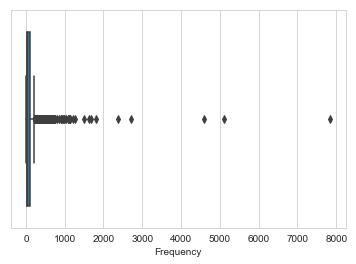

In [33]:
ax = sb.boxplot(RFM['Frequency'])

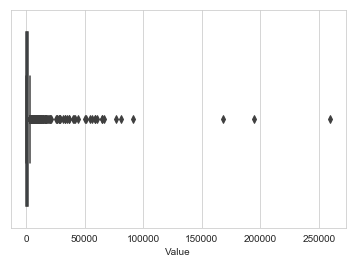

In [34]:
ax1 = sb.boxplot(RFM['Value'])

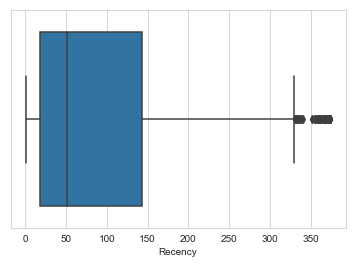

In [35]:
ax2 = sb.boxplot(RFM['Recency'].dt.days)

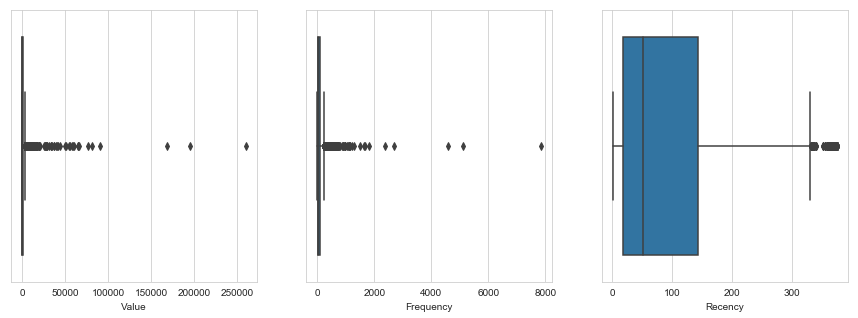

In [36]:
fig, axs = plt.subplots(1,3, figsize = (15,5))

sb.boxplot(RFM.Value, ax = axs[0])
sb.boxplot(RFM.Frequency, ax = axs[1])
sb.boxplot(RFM.Recency.dt.days, ax = axs[2])

plt.tight_layout
plt.show()


In [37]:
import numpy as np
Q1=RFM.Value.quantile(0.25)
Q3=RFM.Value.quantile(0.75)
IQR=Q3-Q1
RFM = RFM[(RFM['Value']>=Q1-1.5*IQR) & (RFM['Value'] <= Q3+1.5*IQR)]

In [38]:
import numpy as np
Q1=RFM.Frequency.quantile(0.25)
Q3=RFM.Frequency.quantile(0.75)
IQR=Q3-Q1
RFM = RFM[(RFM['Frequency']>=Q1-1.5*IQR) & (RFM['Frequency'] <= Q3+1.5*IQR)]

In [39]:
import numpy as np
Q1=RFM.Recency.dt.days.quantile(0.25)
Q3=RFM.Recency.dt.days.quantile(0.75)
IQR=Q3-Q1
RFM = RFM[(RFM['Recency'].dt.days>=Q1-1.5*IQR) & (RFM['Recency'].dt.days <= Q3+1.5*IQR)]

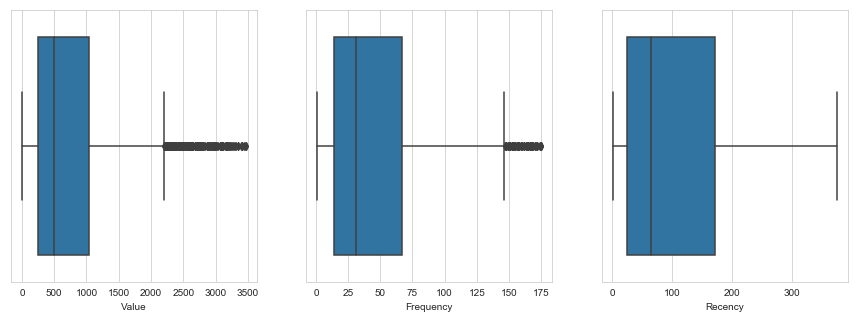

In [40]:
fig, axs = plt.subplots(1,3, figsize = (15,5))

sb.boxplot(RFM.Value, ax = axs[0])
sb.boxplot(RFM.Frequency, ax = axs[1])
sb.boxplot(RFM.Recency.dt.days, ax = axs[2])

plt.tight_layout
plt.show()


In [41]:
#scalling data for Kmeans
from sklearn.preprocessing import StandardScaler

In [42]:
RFM_new= RFM.drop('CustomerID', axis=1)
RFM_new['Recency']=RFM_new['Recency'].dt.days

In [43]:
scaler=StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(RFM_new), columns=RFM_new.columns)

In [44]:
df_scaled.head(5)

,Recency,Frequency,Value
0,-0.985671,0.324296,0.253416
1,1.076955,-0.969434,-0.941627
2,-0.330714,0.006966,0.262615
3,-0.291612,-0.993844,1.402803
4,-0.438245,-0.505644,-0.513470


### using Clustering Algorithms

In [45]:
from sklearn.cluster import KMeans

In [46]:
#Elbow method

sse=[]
k_range =range(1,10)

for k in k_range:
    model = KMeans(n_clusters=k)
    model.fit(df_scaled)
    sse.append(model.inertia_)


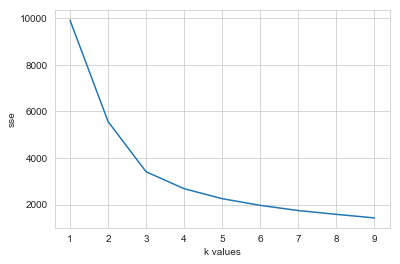

In [47]:
plt.xlabel('k values')
plt.ylabel('sse')
plt.plot(k_range,sse)

In [48]:
#Silhouette method

from sklearn.metrics import silhouette_score

sil=[]
k_range = range(2,10)

for k in k_range:
    model1=KMeans(n_clusters=k)
    model1.fit(df_scaled)
    silhouette_avg = silhouette_score(df_scaled,model1.labels_)
    sil.append([k, silhouette_avg])

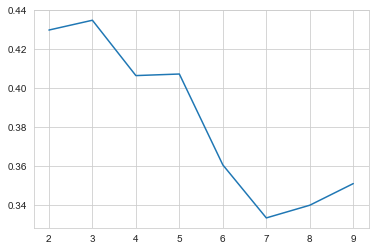

In [49]:
plt.plot(pd.DataFrame(sil)[0],pd.DataFrame(sil)[1])

In [3]:
#according to elbow point and maximum Silhouette score, K=3 provides optimum number of clusters

In [50]:
#k=3 final model
final_model= KMeans(n_clusters=3)
final_model.fit(df_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [51]:
#getting output (predicted customer cluster labels) into a table
RFM.index = pd.RangeIndex(len(RFM.index))
RFM_cluster = pd.concat([RFM, pd.Series(final_model.labels_)], axis=1)
RFM_cluster.columns=['CustomerID','Recency','Frequency','Value','Customer_cluster']
RFM_cluster.head(5)

,CustomerID,Recency,Frequency,Value,Customer_cluster
0,12820.0,4 days,59,942.34,2
1,12821.0,215 days,6,92.72,0
2,12822.0,71 days,46,948.88,2
3,12823.0,75 days,5,1759.50,2
4,12824.0,60 days,25,397.12,2


Cluster vishualization

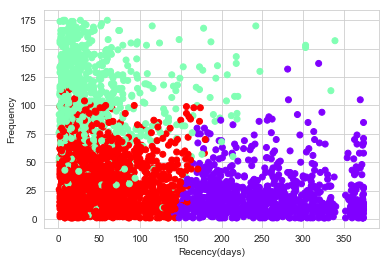

In [52]:
plt.xlabel('Recency(days)')
plt.ylabel('Frequency')
plt.scatter(RFM['Recency'].dt.days, RFM['Frequency'], c=final_model.labels_, cmap='rainbow')

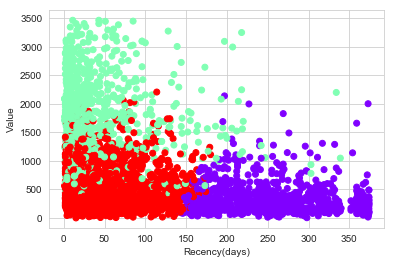

In [53]:
plt.xlabel('Recency(days)')
plt.ylabel('Value')
plt.scatter(RFM['Recency'].dt.days, RFM['Value'], c=final_model.labels_, cmap='rainbow')

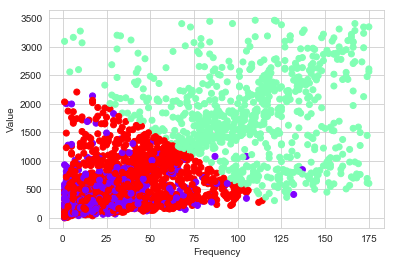

In [54]:
plt.xlabel('Frequency')
plt.ylabel('Value')
plt.scatter(RFM['Frequency'], RFM['Value'], c=final_model.labels_, cmap='rainbow')

<IPython.core.display.Javascript object>


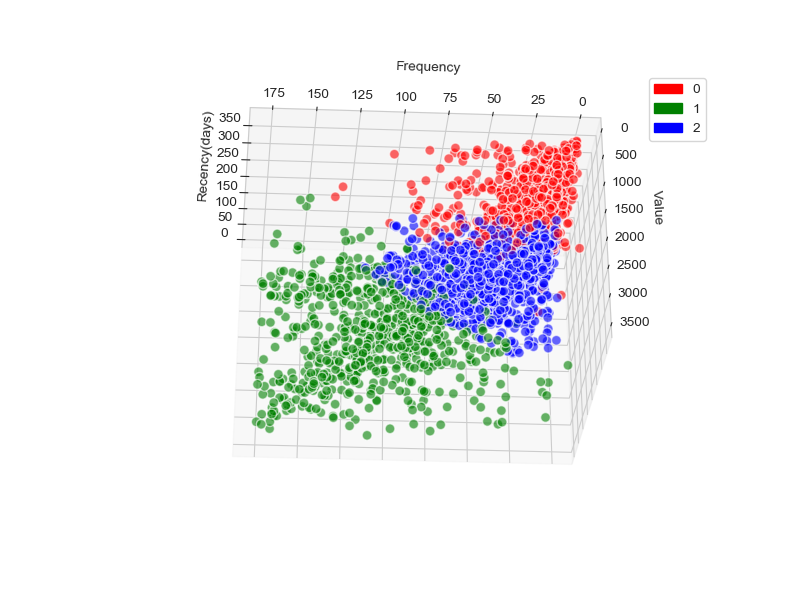

In [57]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.patches as mpatches
%matplotlib notebook

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

xs = RFM['Recency'].dt.days
ys = RFM['Frequency']
zs = RFM['Value']


labels = np.array(final_model.labels_)

LABEL_COLOR_MAP = {0 : 'r',
                   1 : 'g',
                   2 : 'b'
                   }
label_color = [LABEL_COLOR_MAP[j] for j in labels]

ax.scatter(xs, ys,zs,s=50, alpha=0.6, edgecolors='w', c =label_color)

red_patch = mpatches.Patch(color='red', label='0')
green_patch = mpatches.Patch(color='green', label='1')
blue_patch = mpatches.Patch(color='blue', label='2')

ax.legend(handles=[red_patch,green_patch,blue_patch],loc='best')

ax.set_xlabel('Recency(days)')
ax.set_ylabel('Frequency')
ax.set_zlabel('Value')

plt.show()

In [56]:
labels = final_model.labels_
print(np.unique(labels))

[0 1 2]
